# Branje člankov Elektrotehniškega vestnika

Primer uporabe API-ja za prenos člankov s strežnika ter branje in izpisovanje dokumentov z meta podatki.

In [1]:
from textsemantics.server_api import ServerAPI

Ustvarimo povezavo s strežnikom. Pri povezovanju na strežnik projekta ni potrebno podati naslova strežnika. Nato pridobimo imena vseh korpusov (naborov podatkov), ki so na voljo na strežniku, in jih izpišemo.

In [2]:
api = ServerAPI()
datasets = api.list_datasets()
for name, path in datasets: print(name)

CTCH
elektrotehniski-vestnik-clanki
predlogi-vladi
zakoni-o-registrih


Izberemo korpus `elektrotehniski-vestnik-clanki`, ki vsebuje članke revije Elektrotehniški vestnik.

In [3]:
api.get_dataset_info('elektrotehniski-vestnik-clanki')

{'Instances number': 386, 'Metadata type': 'CSV'}

Izpišemo meta podatke za prvih 10 dokumentov izbranega korpusa.

In [4]:
metadata = api.get_metadata('elektrotehniski-vestnik-clanki')
metadata.head(10)

,Title,Abstract,Keywords,URL,Text file
0,Uporaba komercialnega sledilnika točki maksima...,"Pri letalniku, ki uporablja baterije kot prima...","['brezpilotni letalnik', 'sledilnik točki maks...",https://ev.fe.uni-lj.si/1-2-2020/Hrovatin.pdf,http://file.biolab.si/text-semantics/data/elek...
1,SIZiF - i-sistem izpitov na Zdravstveni fakult...,SIZiF je informacijsko-tehnološko podprt siste...,"['pisni preizkusi znanja', 'optična razpoznava...",https://ev.fe.uni-lj.si/1-2-2020/Fosnaric.pdf,http://file.biolab.si/text-semantics/data/elek...
2,Uspešnost regulative pri vzpostavitvi in delov...,Marca 2011 je začela delovati agencija Agency ...,"['ACER', 'regulator', 'trgovec', 'notranji trg...",https://ev.fe.uni-lj.si/1-2-2020/Klopcic.pdf,http://file.biolab.si/text-semantics/data/elek...
3,Optični komunikacijski poskusi za interaktivno...,"Optične komunikacije, zasnovane na optičnem vl...","['optične komunikacije', 'optično vlakno', 'in...",https://ev.fe.uni-lj.si/1-2-2020/Baliz.pdf,http://file.biolab.si/text-semantics/data/elek...
4,Uporaba metode absolutnih vozliščnih koordinat...,Umestitev v prostor je eden izmed ključnih izz...,"['daljnovod', 'žledenje', 'absolutne vozliščne...",https://ev.fe.uni-lj.si/1-2-2020/Zemljaric.pdf,http://file.biolab.si/text-semantics/data/elek...
5,Koncept priprave navodil za uporabo proizvodov,"Poznavanje, razumevanje in uporaba evropske te...","['tehnična dokumentacija', 'standard ISO', 'st...",https://ev.fe.uni-lj.si/1-2-2020/Smolic.pdf,http://file.biolab.si/text-semantics/data/elek...
6,Načrtovanje najboljšega naslednjega pogleda za...,Kakovost pridobljenega 3D-modela je močno odvi...,"['računalniški vid', '3D-rekonstrukcija', 'str...",https://ev.fe.uni-lj.si/3-2020/Zarn.pdf,http://file.biolab.si/text-semantics/data/elek...
7,Modalna in elektromagnetna analiza preklopnega...,V okviru študije smo s teorijo modalne analize...,"['preklopni reluktančni motor', 'modalna anali...",https://ev.fe.uni-lj.si/3-2020/Corovic.pdf,http://file.biolab.si/text-semantics/data/elek...
8,Protokol za zanesljiv prenos alarmnih sporočil...,Sistem Intervencije.net je namenjen zbiranju i...,"['protokol', 'alarm', 'reševanje', 'intervenci...",https://ev.fe.uni-lj.si/3-2020/Dezman.pdf,http://file.biolab.si/text-semantics/data/elek...
9,Inovativni model za obvladovanje informacijsko...,Uporabniki informacijskih sistemov (IS) se lah...,"['modeliranje', 'varnost', 'programska oprema'...",https://ev.fe.uni-lj.si/3-2020/Fujs.pdf,http://file.biolab.si/text-semantics/data/elek...


Izberemo prvi dokument in ga naložimo. Nato pogledamo vsebino.

In [5]:
doc = api.get_text(metadata["Text file"][0])
" ".join(doc.split())

'1 UVOD Brezpilotni letalniki se danes nepogrešljivo pojavljajo v številnih aplikacijah, predvsem pa so zelo dobrodošli tam, kjer bi bilo za človeka prenevarno. Velika uporabnost takih sistemov narekuje njihovo čim večjo avtonomijo. Če se kot primarni vir napajanja letalnika uporablja baterija, lahko z gotovostjo trdimo, da bo njegova avtonomija odvisna od količine razpoložljive energije v bateriji ter električne porabe takega letalnika. Hitro tako sledi, da je povečanje avtonomije mogoče doseči z zmanjšanjem električne porabe sistema ali z zamenjavo baterije s tako, ki zagotavlja višjo kapaciteto hranjenja energije pri enaki masi, kar pomeni višjo gravimetrično kapaciteto. Pri zmanjšanju električne porabe sistema je največkrat na voljo le malo manevrskega prostora. Elektronika letala porabi le manjši del električne energije, največ je porabi pogonski sklop. Poraba zadnjega je v zelo veliki meri odvisna tudi od vremenskih razmer. Pregled trga masovno proizvedenih baterij pokaže, da bi 

Ker dokumentov ne bomo brali enega za drugim, si poglejmo raje lastnosti celotnega nabora besedil.

In [6]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from lemmagen.lemmatizer import Lemmatizer
from lemmagen import DICTIONARY_SLOVENE

def preprocess(doc):
    stop_words = set(stopwords.words('slovene'))
    tokenizer = RegexpTokenizer("\w+")
    lemmatizer = Lemmatizer(dictionary=DICTIONARY_SLOVENE)
    tokens = tokenizer.tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens 
              if token not in stop_words 
              and len(token) > 2 
              and not token.isnumeric()]
    return tokens

Najprej pripravimo korpus, ki je zbirka vseh besedil Elektrotehniškega vestnika.

In [7]:
corpus = []
for i in metadata["Text file"]:
    corpus.append(api.get_text(i))

Pripravimo pojavnice, ki bodo osnovna enota naše analize.

In [8]:
tokens = preprocess(' '.join(corpus))

In [9]:
print(f"Število besed v korpusu: {len(tokens)}")
print(f"Število unikatnih besed: {len(set(tokens))}")

Število besed v korpusu: 751060
Število unikatnih besed: 37031


Nato prikažemo najpogostejših 10 besed v korpusu. Očitno večina prispevkov opisuje take in drugačne sisteme z njihovimi tehničnimi lastnostmi. Koristno bi bilo, če bi odstranili besede, ki zaznamujejo akademsko pisanje (npr. slika, vrednost, metoda, primer, rezultat), saj bi tako lažje zaobjeli vsebino člankov.

In [10]:
dist = nltk.FreqDist(tokens)
common = dist.most_common(10)
print("Najpogostejših 10 besed v korpusu:")
for word, count in common: print(f"    {word}: {count}")

Najpogostejših 10 besed v korpusu:
    slika: 8056
    sistem: 5922
    lahek: 5331
    vrednost: 4101
    velik: 3823
    model: 3568
    metoda: 2970
    primer: 2950
    uporaba: 2930
    rezultat: 2813


Utežimo besede z metodo TF-IDF in si poglejmo najpogostejše besede po obtežitvi.

In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=set(stopwords.words('slovene')))
tfs = tfidf.fit_transform(corpus)

feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(tfs.toarray()).flatten()[::-1]

In [12]:
top_n = feature_array[tfidf_sorting][:10]
for word in top_n:
    print(word)

tarče
sevanja
temperature
velikosti
negotovost
negotovosti
termometra
sevalnega
termometer
vpliva


Besede so precej bolj zanimive kot prej. Poglejmo si jih še v oblaku besed.

In [13]:
weights = {}
for key, value in zip(feature_array, tfs.toarray().mean(axis=0)):
    weights[key] = value

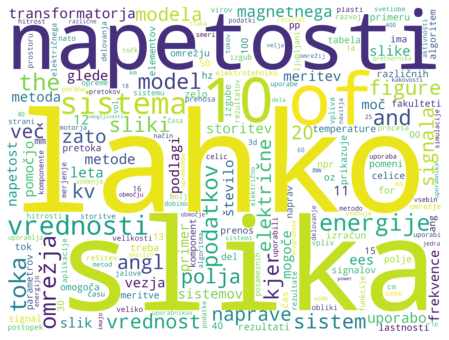

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=4000, height=3000, random_state=0, background_color="white"
)
wordcloud.generate_from_frequencies(weights)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");